In [1]:
import pandas as pd
from tqdm import tqdm, tqdm_notebook
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objs as go
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tqdm().pandas()

0it [00:00, ?it/s]


In [4]:
df = pd.read_csv(
    '../dataset/cluster/2020-02-road7-in-5cluster.csv', parse_dates=["datetime"])
df['label'] = df['cluster'].apply(lambda row: 1 if row == 1 else 0)
df


,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N,cluster,label
0,2020-02-01 00:00:34,7,2,in,3,3,0,0,59,81,60,61,0.057692,0.000000,0.7375,2,0
1,2020-02-01 00:00:34,7,3,in,0,0,5,0,0,0,0,0,0.000000,0.113636,0.0000,1,1
2,2020-02-01 00:00:34,7,6,in,1,0,3,1,5,5,0,0,0.000000,0.068182,0.0625,1,1
3,2020-02-01 00:00:34,7,7,in,1,1,4,0,72,72,20,20,0.019231,0.090909,0.9000,3,0
4,2020-02-01 00:00:34,7,10,in,10,7,6,3,69,103,43,60,0.134615,0.136364,0.8625,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503722,2020-02-29 23:59:14,7,108,in,2,2,2,0,38,52,68,76,0.038462,0.045455,0.4750,0,0
4503723,2020-02-29 23:59:14,7,109,in,1,1,3,0,36,36,60,60,0.019231,0.068182,0.4500,0,0
4503724,2020-02-29 23:59:14,7,111,in,1,1,0,0,64,64,60,60,0.019231,0.000000,0.8000,2,0
4503725,2020-02-29 23:59:14,7,114,in,0,0,1,0,0,0,0,0,0.000000,0.022727,0.0000,1,1


In [6]:
df[df['label']==1]

,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N,cluster,label
1,2020-02-01 00:00:34,7,3,in,0,0,5,0,0,0,0,0,0.000000,0.113636,0.0000,1,1
2,2020-02-01 00:00:34,7,6,in,1,0,3,1,5,5,0,0,0.000000,0.068182,0.0625,1,1
7,2020-02-01 00:00:34,7,13,in,4,4,5,0,15,20,96,122,0.076923,0.113636,0.1875,1,1
9,2020-02-01 00:00:34,7,15,in,0,0,2,0,0,0,0,0,0.000000,0.045455,0.0000,1,1
11,2020-02-01 00:00:34,7,18,in,0,0,2,0,0,0,0,0,0.000000,0.045455,0.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503711,2020-02-29 23:59:14,7,96,in,0,0,8,0,0,0,0,0,0.000000,0.181818,0.0000,1,1
4503714,2020-02-29 23:59:14,7,99,in,0,0,2,0,0,0,0,0,0.000000,0.045455,0.0000,1,1
4503715,2020-02-29 23:59:14,7,100,in,0,0,2,0,0,0,0,0,0.000000,0.045455,0.0000,1,1
4503718,2020-02-29 23:59:14,7,104,in,0,0,1,0,0,0,0,0,0.000000,0.022727,0.0000,1,1


In [7]:
df_corr = df.filter(['all_units','inflow_units','outflow_unit','samecell_units','avg_speed','max_speed','avg_traveltime','max_traveltime','cluster','label'],axis=1)
corr = df_corr.corr()

<AxesSubplot:>

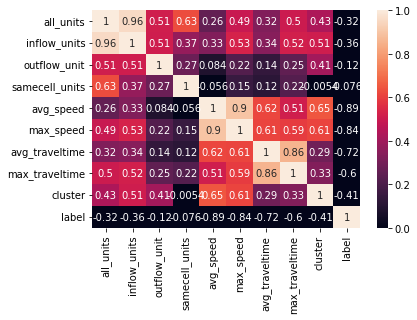

In [9]:
sns.heatmap(corr, vmin=0, vmax=1, annot=True)


In [ ]:
d_cols = ['all_units','inflow_units','avg_traveltime','max_traveltime']

In [ ]:
x = df[d_cols]
y = df['cluster']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

In [ ]:
y_pred = tree.predict(x_test)

In [ ]:
y_test.value_counts()

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(y_test, y_pred))